In [26]:
import numpy as np
import pandas as pd

from sklearn import mixture
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [3]:
df = pd.read_csv('data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'].mean()

864.2065423050761

In [8]:
df.drop('CUST_ID', axis=1, inplace=True)

In [18]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
X[0][0]

-0.7319893664465486

<AxesSubplot:>

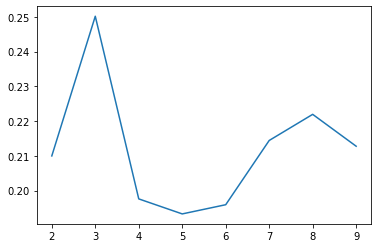

In [28]:
def get_silhuete(X, model):
    
    model.fit(X)
    silhuete = metrics.silhouette_score(X, model.labels_)
    
    return silhuete

silhuetes = []
for i in range(2, 10):
    model = cluster.KMeans(n_clusters=i)
    silhuetes.append(get_silhuete(X, model))
    
sns.lineplot(x=[i for i in range(2, 10)], y=silhuetes)

In [21]:
model = cluster.KMeans(n_clusters=3)
model.fit(X)
df['label'] = model.labels_
df['label'].value_counts().sort_values(ascending=False)

1    6119
2    1596
0    1235
Name: label, dtype: int64

In [30]:
model = cluster.DBSCAN()
model.fit(X)
df['label'] = model.labels_
df['label'].value_counts().count() - 1

38

In [32]:
result = {}
max_silhuete = -np.Inf
for i in np.arange(0.1, 3, 0.2):
    for j in range(1, 20, 4):
        model = cluster.DBSCAN(eps=i, min_samples=j)
        silhuete = get_silhuete(X, model)
        if silhuete > max_silhuete:
            result = {'eps': i, 'min_sample': j, 'silhuete': silhuete}
            max_silhuete = silhuete
            
print(result)

{'eps': 2.900000000000001, 'min_sample': 5, 'silhuete': 0.6173453608696496}


<AxesSubplot:>

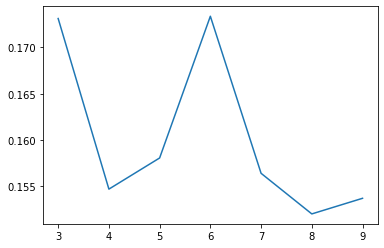

In [34]:
silhuetes = []
for i in range(3, 10):
    model = cluster.AgglomerativeClustering(n_clusters=i)
    silhuetes.append(get_silhuete(X, model))
    
sns.lineplot(x=[i for i in range(3, 10)], y=silhuetes)

In [35]:
silhuetes

[0.1731098007232828,
 0.1547093352037027,
 0.15806867978666445,
 0.17335577924064002,
 0.156415467090623,
 0.15203451293262077,
 0.15371895842035113]

In [39]:
model = cluster.AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters=6)
model.fit(X)
df['label'] = model.labels_
df['label'].value_counts().sort_values(ascending=False)

1    8921
2      18
0       5
4       4
3       1
5       1
Name: label, dtype: int64